# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [ ]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.|

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install -r requirements.txt

## Imports

In [ ]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [ ]:
# Define transforms
## YOUR CODE HERE ##
# transform = transforms.Compose([transforms.ToTensor(),transforms.flatten()])
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

## YOUR CODE HERE ##
training_data=datasets.MNIST(root="data",train=True,download=True,transform=transform)
train_loader=DataLoader(training_data,batch_size=32,shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
testing_data=datasets.MNIST(root="data",train=False,download=True,transform=transform)
test_loader=DataLoader(testing_data,batch_size=32)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

> first i chose toTensor to convert the data into multi dimensional arrays for faster computation for the images and then chose to normalise the data so that it becomes easier for computation since the data would lie in the same range and further on i flatten the image to make it available in the one dimension .




## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [ ]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


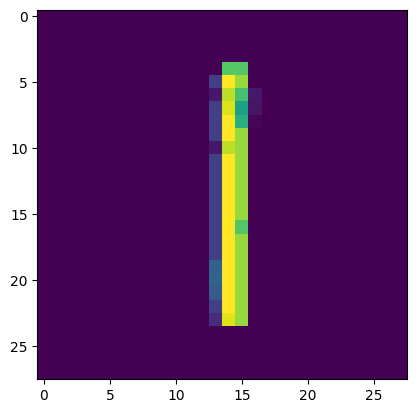

9


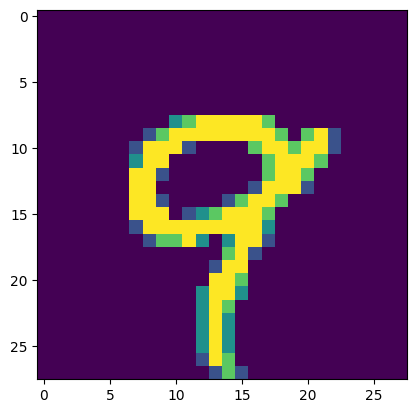

0


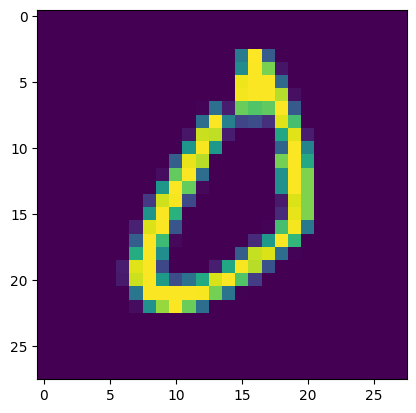

3


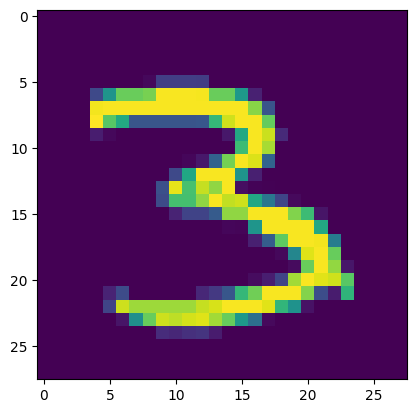

3


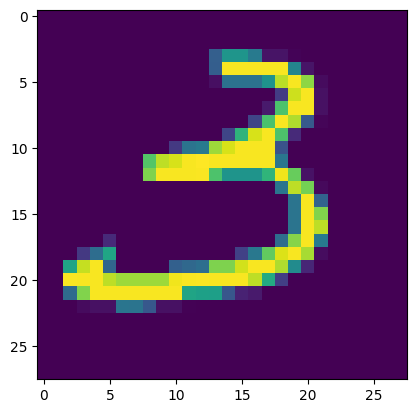

In [ ]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [ ]:
## YOUR CODE HERE ##
# Define the class for your neural network
class MNIST_MLP(nn.Module):
    def __init__(self):
        super(MNIST_MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 120)  # Corrected input dimension for MNIST
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.activation = nn.ReLU()
        self.output = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the input tensor
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output(self.fc3(x))
        return x


# Instantiate the model
net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=2352, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [ ]:
## YOUR CODE HERE ##
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [ ]:
mlp = MNIST_MLP()
if torch.cuda.is_available():
    mlp.cuda()

Plot the training loss (and validation loss/accuracy, if recorded).

Epoch 1 training accuracy: 99.99% training loss: 0.00072
Epoch 1 validation accuracy: 98.39% validation loss: 0.10507
Epoch 2 training accuracy: 99.99% training loss: 0.00055
Epoch 2 validation accuracy: 98.41% validation loss: 0.10533
Epoch 3 training accuracy: 99.99% training loss: 0.00051
Epoch 3 validation accuracy: 98.46% validation loss: 0.10756
Epoch 4 training accuracy: 100.00% training loss: 0.00040
Epoch 4 validation accuracy: 98.47% validation loss: 0.10920
Epoch 5 training accuracy: 99.99% training loss: 0.00037
Epoch 5 validation accuracy: 98.42% validation loss: 0.10847
Epoch 6 training accuracy: 100.00% training loss: 0.00033
Epoch 6 validation accuracy: 98.44% validation loss: 0.11020
Epoch 7 training accuracy: 100.00% training loss: 0.00029
Epoch 7 validation accuracy: 98.38% validation loss: 0.11063
Epoch 8 training accuracy: 100.00% training loss: 0.00026
Epoch 8 validation accuracy: 98.46% validation loss: 0.11228
Epoch 9 training accuracy: 99.99% training loss: 0.0

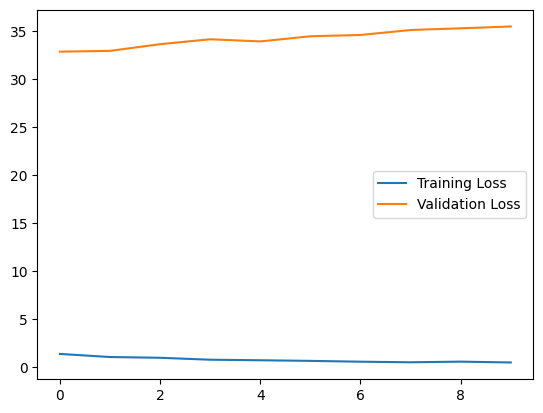

In [50]:
## YOUR CODE HERE ##
# Function to train the network
def train_network_classification(net, train_loader, test_loader):
    num_epochs = 10

    criterion = nn.NLLLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

    train_loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):
            inputs, labels = data

            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(training_data)*100:.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)

        val_loss = 0.0
        val_correct = 0
        net.eval()
        with torch.no_grad():
            for inputs, labels in test_loader:
                if torch.cuda.is_available():
                    inputs, labels = inputs.cuda(), labels.cuda()

                outputs = net(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs.data, 1)
                val_correct += (preds == labels).sum().item()
                val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(testing_data)*100:.2f}% validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()

# Train the model
train_network_classification(mlp, train_loader, test_loader)


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
## YOUR CODE HERE ##
def evaluate_model(net, test_loader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = (correct / total) * 100
    return accuracy


In [ ]:
test_accuracy = evaluate_model(mlp, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 97.46%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch 1 training accuracy: 98.87% training loss: 0.03656
Epoch 1 validation accuracy: 97.41% validation loss: 0.12866
Epoch 2 training accuracy: 98.94% training loss: 0.03234
Epoch 2 validation accuracy: 97.80% validation loss: 0.12015
Epoch 3 training accuracy: 99.06% training loss: 0.02899
Epoch 3 validation accuracy: 97.60% validation loss: 0.12501
Epoch 4 training accuracy: 99.10% training loss: 0.02828
Epoch 4 validation accuracy: 97.51% validation loss: 0.12937
Epoch 5 training accuracy: 99.03% training loss: 0.03064
Epoch 5 validation accuracy: 97.07% validation loss: 0.14922
Epoch 6 training accuracy: 99.09% training loss: 0.02878
Epoch 6 validation accuracy: 97.24% validation loss: 0.15702
Epoch 7 training accuracy: 99.13% training loss: 0.02813
Epoch 7 validation accuracy: 97.59% validation loss: 0.12112
Epoch 8 training accuracy: 99.12% training loss: 0.02853
Epoch 8 validation accuracy: 97.60% validation loss: 0.12797
Epoch 9 training accuracy: 99.15% training loss: 0.02685

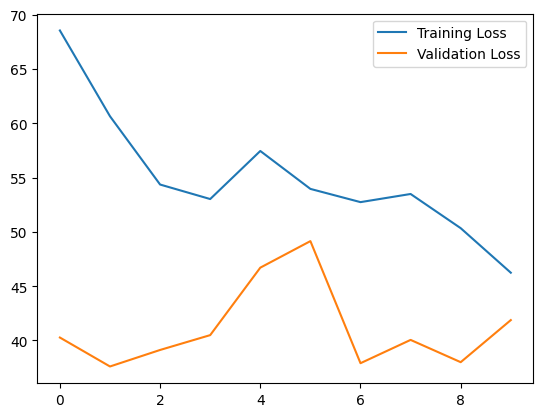

In [48]:
## YOUR CODE HERE ##
def train_network_classification(net, train_loader, test_loader):
    num_epochs = 10

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    train_loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):
            inputs, labels = data

            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(training_data)*100:.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)

        val_loss = 0.0
        val_correct = 0
        net.eval()
        with torch.no_grad():
            for inputs, labels in test_loader:
                if torch.cuda.is_available():
                    inputs, labels = inputs.cuda(), labels.cuda()

                outputs = net(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs.data, 1)
                val_correct += (preds == labels).sum().item()
                val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(testing_data)*100:.2f}% validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()

# Train the model
train_network_classification(mlp, train_loader, test_loader)


In [52]:
## YOUR CODE HERE ##
def evaluate_model(net, test_loader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = (correct / total) * 100
    return accuracy

In [53]:
test_accuracy = evaluate_model(mlp, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 98.43%


## Saving your model
Using `torch.save`, save your model for future loading.

In [57]:
## YOUR CODE HERE ##
torch.save(mlp.state_dict(), 'mnist_mlp.pth')